# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


In [9]:
df_train.head().T

,0,1,2,3,4
AGREEMENT_RK,59910150,59910230,59910525,59910803,59911781
TARGET,0,0,0,0,0
AGE,49,32,52,39,30
SOCSTATUS_WORK_FL,1,1,1,1,1
SOCSTATUS_PENS_FL,0,0,0,0,0
GENDER,1,1,1,1,0
CHILD_TOTAL,2,3,4,1,0
DEPENDANTS,1,3,0,1,0
EDUCATION,Среднее специальное,Среднее,Неполное среднее,Высшее,Среднее
MARITAL_STATUS,Состою в браке,Состою в браке,Состою в браке,Состою в браке,Состою в браке


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [10]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [11]:
df = df_test.append(df_train).reset_index(drop=True)

In [12]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [14]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее специальное', 'Два и более высших образования', 'Высшее', 'Ученая степень', 'Неполное среднее', 'Неоконченное высшее', 'Среднее'}


MARITAL_STATUS
{'Вдовец/Вдова', 'Разведен(а)', 'Гражданский брак', 'Состою в браке', 'Не состоял в браке'}


GEN_INDUSTRY
{'Государственная служба', nan, 'Строительство', 'Ресторанный бизнес/Общественное питание', 'Сборочные производства', 'Транспорт', 'Маркетинг', 'Энергетика', 'Банк/Финансы', 'Сельское хозяйство', 'Информационные услуги', 'Металлургия/Промышленность/Машиностроение', 'ЧОП/Детективная д-ть', 'Недвижимость', 'Салоны красоты и здоровья', 'Юридические услуги/нотариальные услуги', 'Информационные технологии', 'Другие сферы', 'Нефтегазовая промышленность', 'Химия/Парфюмерия/Фармацевтика', 'Подбор персонала', 'Логистика', 'Туризм', 'Управляющая компания', 'Здравоохранение', 'Образование', 'Коммунальное хоз-во/Дорожные службы', 'СМИ/Реклама/PR-агенства', 'Страхование', 'Наука', 'Торговля', 'Развлечения/Искусство'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [15]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

Количественные колонки например PREVIOUS_CARD_NUM_UTILIZED заполнить нулями. Так же есть здесь пропуски в строковых колонках, которые на самом деле цифры. Их нужно конвертировать в числа и заполнить пропуски медианой

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Их можно конвертировать в числа или разбить на колонки

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [16]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    ## Your Code Here
    df_output = df_output.drop(['AGREEMENT_RK', 'MARITAL_STATUS'], axis=1)
    df_output = df_output.drop(['GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL',
                                'JOB_DIR', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE',
                                'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM'], axis=1)
    
    for col in ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']:
        df_output.loc[:, col] = df_input.loc[:, col].\
            map(lambda x: x.replace(',', '.')).\
            astype('float')
    
    df_output.loc[:,'EDUCATION'] = df_input.loc[:,'EDUCATION'].replace({
        'Неполное среднее': 0,
        'Среднее специальное': 1, 
        'Среднее': 2,
        'Неоконченное высшее': 3, 
        'Высшее': 4, 
        'Два и более высших образования': 5, 
        'Ученая степень': 6
    })
    
    df_output.loc[:, 'FAMILY_INCOME'] = df_input.loc[:, 'FAMILY_INCOME'].\
        replace({
            'до 5000 руб.': 0,
            'от 5000 до 10000 руб.': 1,
            'от 10000 до 20000 руб.': 2,
            'от 20000 до 50000 руб.': 3,
            'свыше 50000 руб.': 4
        })
    
    marital_statuses = [
        'Не состоял в браке', 
        'Гражданский брак', 
        'Состою в браке',
        'Вдовец/Вдова',
        'Разведен(а)', 
    ]
    for i, status in enumerate(marital_statuses):
        df_output.loc[:, 'MARITAL_STATUS_{}'.format(i)] = df_input.loc[:, 'MARITAL_STATUS'].\
            map(lambda e: int(e == status))
    
    worktime_med = df_input['WORK_TIME'].median()
    df_output.loc[:, 'WORK_TIME'] = df_input.loc[:, 'WORK_TIME'].\
        map(lambda v: worktime_med if pd.isna(v) else v)
    
    df_output.loc[:, 'PREVIOUS_CARD_NUM_UTILIZED'] = df_input.loc[:,'PREVIOUS_CARD_NUM_UTILIZED'].\
        map(lambda v: 0 if pd.isna(v) else v)
    
    return df_output

In [17]:
df.pipe(preproc_data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 46 columns):
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null int64
FAMILY_INCOME                 30133 non-null int64
PERSONAL_INCOME               30133 non-null float64
REG_FACT_FL                   30133 non-null int64
FACT_POST_FL                  30133 non-null int64
REG_POST_FL                   30133 non-null int64
REG_FACT_POST_FL              30133 non-null int64
REG_FACT_POST_TP_FL           30133 non-null int64
FL_PRESENCE_FL                30133 non-null int64
OWN_AUTO                      30133 non-null int64
AUTO_RUS_FL           

In [18]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [ ]:
X, y = df_train_preproc.iloc[:, 1:].values, df_train_preproc.iloc[:, 0].values
X_test, y_test = df_test_preproc.iloc[:, 1:].values, df_test_preproc.iloc[:, 0].values

#### Задание 5. Обучение и оценка качества разных моделей

In [ ]:
try:
    from sklearn.model_selection import train_test_split
except ImportError:
    from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X_train, X_test2, y_train, y_test2 = train_test_split(
    X, y, test_size=0.3, random_state=42)


In [ ]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here

model = LogisticRegression()
model.fit(X_train, y_train)
p = model.predict(X_train)
print(len(X_train))

/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


10656


In [ ]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
acc = accuracy_score(y_train, p)
prec = precision_score(y_train, p)
rec = recall_score(y_train, p)
print(acc, prec, rec)

0.8820382882882883 0.5 0.002386634844868735


In [ ]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

models_df = pd.DataFrame([[0, 0, 0], [acc, prec, rec]], columns=['accuracy', 'precision', 'recall'])


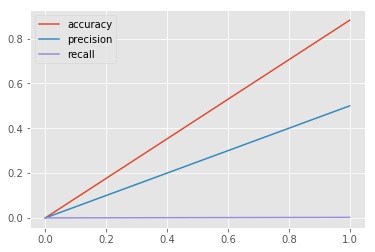

In [ ]:
models_df['accuracy'].plot()
models_df['precision'].plot()
models_df['recall'].plot()
plt.legend()

(-0.01, 1.01)

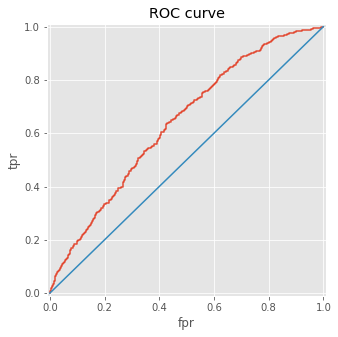

In [ ]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

## Your Code Here
from sklearn.metrics import roc_auc_score, roc_curve
predict_proba = model.predict_proba(X_test2)
fpr, tpr, thresholds = roc_curve(y_test2, predict_proba[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [ ]:
try:
    from sklearn.model_selection import cross_val_score, StratifiedKFold
except ImportError:
    from sklearn.cross_validation import cross_val_score, StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here

cv = StratifiedKFold(n_splits=10, shuffle=True, 
                     random_state=42)
scores = cross_val_score(model, X_train, y_train,
                         scoring='roc_auc', 
                         cv=cv, 
                         n_jobs=-1)

print(scores.mean())


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

0.6282498022104182


In [ ]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

model = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

param_grid = {
    'scaler__with_mean': [False, True],
    'clf__penalty': ['l1', 'l2'],
    'clf__random_state': [42],
    'clf__C': np.logspace(-5, 3, 10)
}

print(param_grid)

# Задаем схему кросс-валидации
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

grid_searcher = GridSearchCV(model, param_grid, 
                             scoring='roc_auc', 
                             n_jobs=-1, cv=cv, 
                             verbose=2)

grid_searcher.fit(X, y)

best_model = grid_searcher.best_estimator_
predict = best_model.predict(X_test)

accuracy_score(y_test, predict), \
precision_score(y_test, predict), \
recall_score(y_test, predict)
## Your Code Here

{'scaler__with_mean': [False, True], 'clf__C': array([1.00000000e-05, 7.74263683e-05, 5.99484250e-04, 4.64158883e-03,
       3.59381366e-02, 2.78255940e-01, 2.15443469e+00, 1.66810054e+01,
       1.29154967e+02, 1.00000000e+03]), 'clf__random_state': [42], 'clf__penalty': ['l1', 'l2']}
Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] scaler__with_mean=False, clf__C=1e-05, clf__random_state=42, clf__penalty=l1 
[CV]  scaler__with_mean=False, clf__C=1e-05, clf__random_state=42, clf__penalty=l1, total=   0.0s
[CV] scaler__with_mean=False, clf__C=1e-05, clf__random_state=42, clf__penalty=l1 
[CV]  scaler__with_mean=False, clf__C=1e-05, clf__random_state=42, clf__penalty=l1, total=   0.0s
[CV] scaler__with_mean=False, clf__C=1e-05, clf__random_state=42, clf__penalty=l1 
[CV]  scaler__with_mean=False, clf__C=1e-05, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=False, clf__C=1e-05, clf__random_state=42, clf__penalty=l1 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=1e-05, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=False, clf__C=1e-05, clf__random_state=42, clf__penalty=l1 
[CV]  scaler__with_mean=False, clf__C=1e-05, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=True, clf__C=1e-05, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=1e-05, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=True, clf__C=1e-05, clf__random_state=42, clf__penalty=l1 
[CV]  scaler__with_mean=True, clf__C=1e-05, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=True, clf__C=1e-05, clf__random_state=42, clf__penalty=l1 
[CV]  scaler__with_mean=True, clf__C=1e-05, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=True, clf__C=1e-05, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=1e-05, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=True, clf__C=1e-05, clf__random_state=42, clf__penalty=l1 
[CV]  scaler__with_mean=True, clf__C=1e-05, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=False, clf__C=1e-05, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=False, clf__C=1e-05, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=False, clf__C=1e-05, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=1e-05, clf__random_state=42, clf__penalty=l2, total=   0.0s
[CV] scaler__with_mean=False, clf__C=1e-05, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=False, clf__C=1e-05, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=False, clf__C=1e-05, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=False, clf__C=1e-05, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=False, clf__C=1e-05, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=False, clf__C=1e-05, clf__random_state=42, clf__penalty=l2, total=   0.0s
[CV] scaler__with_mean=True, clf__C=1e-05, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=1e-05, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=True, clf__C=1e-05, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=True, clf__C=1e-05, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=True, clf__C=1e-05, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=True, clf__C=1e-05, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=True, clf__C=1e-05, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=True, clf__C=1e-05, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=True, clf__C=1e-05, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=1e-05, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=False, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l1 
[CV]  scaler__with_mean=False, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=False, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l1 
[CV]  scaler__with_mean=False, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=False, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l1 
[CV]  scaler__with_mean=False, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=False, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=False, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l1 
[CV]  scaler__with_mean=False, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=True, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=True, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l1 
[CV]  scaler__with_mean=True, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=True, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l1 
[CV]  scaler__with_mean=True, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=True, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=True, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l1 
[CV]  scaler__with_mean=True, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=False, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=False, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=False, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=False, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=False, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=False, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=False, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=False, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=True, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=True, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=True, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=True, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=True, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=True, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=True, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=True, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=True, clf__C=7.742636826811278e-05, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=False, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=False, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l1 
[CV]  scaler__with_mean=False, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=False, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l1 
[CV]  scaler__with_mean=False, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=False, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=False, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l1 
[CV]  scaler__with_mean=False, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=True, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l1 
[CV]  scaler__with_mean=True, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=True, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=True, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l1 
[CV]  scaler__with_mean=True, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=True, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l1 
[CV]  scaler__with_mean=True, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=True, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=False, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=False, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=False, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=False, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=False, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=False, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=False, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=False, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=False, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=True, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=True, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=True, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=True, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=True, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=True, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=True, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=True, clf__C=0.0005994842503189409, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=False, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l1 
[CV]  scaler__with_mean=False, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=False, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=False, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l1 
[CV]  scaler__with_mean=False, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=False, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=False, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l1 
[CV]  scaler__with_mean=False, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=True, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=True, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l1 
[CV]  scaler__with_mean=True, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=True, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l1 
[CV]  scaler__with_mean=True, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l1, total=   0.1s

/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] scaler__with_mean=True, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l1 
[CV]  scaler__with_mean=True, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=True, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=False, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=False, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=False, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=False, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=False, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=False, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=False, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=False, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=False, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=True, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=True, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=True, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=True, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=True, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=True, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=True, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=0.004641588833612777, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=False, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l1, total=   0.5s
[CV] scaler__with_mean=False, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l1, total=   0.5s
[CV] scaler__with_mean=False, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l1, total=   0.3s
[CV] scaler__with_mean=False, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l1, total=   0.5s
[CV] scaler__with_mean=False, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l1, total=   0.4s
[CV] scaler__with_mean=True, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l1 
[CV]  scaler__with_mean=True, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l1, total=   0.2s
[CV] scaler__with_mean=True, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=True, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l1 
[CV]  scaler__with_mean=True, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l1, total=   0.2s
[CV] scaler__with_mean=True, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l1, total=   0.1s
[CV] scaler__with_mean=True, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l1 
[CV]  scaler__with_mean=True, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l1, total=   0.2s
[CV] scaler__with_mean=False, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l2, total=   0.2s
[CV] scaler__with_mean=False, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=False, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=False, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=False, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=False, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=False, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l2, total=   0.1s
[CV] scaler__with_mean=True, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=True, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l2, total=   0.2s
[CV] scaler__with_mean=True, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l2, total=   0.2s
[CV] scaler__with_mean=True, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=True, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l2, total=   0.2s
[CV] scaler__with_mean=True, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l2, total=   0.2s
[CV] scaler__with_mean=True, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=True, clf__C=0.03593813663804626, clf__random_state=42, clf__penalty=l2, total=   0.2s
[CV] scaler__with_mean=False, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l1, total=   3.1s
[CV] scaler__with_mean=False, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l1, total=   2.9s
[CV] scaler__with_mean=False, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l1, total=   0.7s
[CV] scaler__with_mean=False, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l1, total=   4.8s
[CV] scaler__with_mean=False, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l1, total=   2.8s
[CV] scaler__with_mean=True, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l1, total=   0.6s
[CV] scaler__with_mean=True, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l1, total=   0.5s
[CV] scaler__with_mean=True, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l1, total=   0.6s
[CV] scaler__with_mean=True, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l1, total=   0.4s
[CV] scaler__with_mean=True, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l1, total=   0.2s
[CV] scaler__with_mean=False, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=False, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l2, total=   0.2s
[CV] scaler__with_mean=False, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l2 

/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV]  scaler__with_mean=False, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l2, total=   0.2s
[CV] scaler__with_mean=False, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l2, total=   0.2s
[CV] scaler__with_mean=False, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l2 
[CV]  scaler__with_mean=False, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l2, total=   0.2s
[CV] scaler__with_mean=False, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l2, total=   0.2s
[CV] scaler__with_mean=True, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l2, total=   0.3s
[CV] scaler__with_mean=True, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l2, total=   0.2s
[CV] scaler__with_mean=True, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l2, total=   0.2s
[CV] scaler__with_mean=True, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l2, total=   0.3s
[CV] scaler__with_mean=True, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=0.2782559402207126, clf__random_state=42, clf__penalty=l2, total=   0.3s
[CV] scaler__with_mean=False, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l1, total=   7.5s
[CV] scaler__with_mean=False, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l1, total=   4.3s
[CV] scaler__with_mean=False, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l1, total=   4.6s
[CV] scaler__with_mean=False, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l1, total=   3.9s
[CV] scaler__with_mean=False, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l1, total=   3.8s
[CV] scaler__with_mean=True, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l1, total=   3.8s
[CV] scaler__with_mean=True, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l1, total=   3.0s
[CV] scaler__with_mean=True, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l1, total=   5.1s
[CV] scaler__with_mean=True, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l1, total=   8.8s
[CV] scaler__with_mean=True, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l1, total=   5.8s
[CV] scaler__with_mean=False, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l2, total=   0.2s
[CV] scaler__with_mean=False, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l2, total=   0.2s
[CV] scaler__with_mean=False, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l2, total=   0.3s
[CV] scaler__with_mean=False, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l2, total=   0.3s
[CV] scaler__with_mean=False, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l2, total=   0.3s
[CV] scaler__with_mean=True, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l2, total=   0.3s
[CV] scaler__with_mean=True, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l2, total=   0.4s
[CV] scaler__with_mean=True, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l2, total=   0.3s
[CV] scaler__with_mean=True, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l2, total=   0.4s
[CV] scaler__with_mean=True, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l2 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=True, clf__C=2.154434690031882, clf__random_state=42, clf__penalty=l2, total=   0.3s
[CV] scaler__with_mean=False, clf__C=16.681005372000556, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  scaler__with_mean=False, clf__C=16.681005372000556, clf__random_state=42, clf__penalty=l1, total=   4.8s
[CV] scaler__with_mean=False, clf__C=16.681005372000556, clf__random_state=42, clf__penalty=l1 


/home/dima/jupyter/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

## Your Code Here

from sklearn.metrics import roc_auc_score, roc_curve
predict_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test2 predict_proba[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [ ]:
### И далее ;)